In [8]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np
import os
import copy
import json

In [9]:
pixMin = 900
pixMax = 900

In [10]:
def getPoint(alto, ancho):
    xInit = random.randint(0, alto - pixMax)
    yInit = random.randint(0, ancho - pixMax)
    xFin = xInit + 900
    yFin = yInit + 900
    return xInit, yInit, xFin, yFin

In [23]:
def validaPuntoDistance(punto, puntosValidos):
    for i in puntosValidos:
        if (puntoValidoDistance(i, punto) == False):
            return False
    return True

def puntoValidoDistance(valido, nuevo):
    # validoX != nuevoX and
    equis = abs(valido[0] - nuevo[0])
    yes = abs(valido[1] - nuevo[1])
    return (equis > 15 or yes > 15)

def validaPunto(punto, puntosValidos):
    for i in puntosValidos:
        if (puntoValidoShip(i, punto) == False):
            return False
    return True

def puntoValidoShip(valido, nuevo):
    cXInit = valido[0] - (nuevo[2] - nuevo[0])
    cYInit = valido[1]
    cXFin = valido[2]
    cYFin = valido[3] + (nuevo[3] - nuevo[1])
    
    nEsqX = nuevo[0]
    nEsqY = nuevo[3]
    
    #print('C', cXInit, cYInit, cXFin, cYFin)
    #print('N', nEsqX, nEsqY)
    
    valX = nEsqX >= cXInit and nEsqX <= cXFin
    valY = nEsqY >= cYInit and nEsqY <= cYFin
    ## Si ambos son verdaderos se intersectan, no es válido
    return (not (valX and valY))

In [24]:
def set(matriz, n, puntos):
    a,b,c,d = puntos
    print(n, '-> ', a,b,c,d)
    for i in range(a,c+1):
        for j in range(b, d+1):
            matriz[i][j] = n

def plotear(aux): 
    plt.clf()
    plt.figure(figsize = (20,10))
    plt.imshow(aux)
    plt.colorbar()
    plt.show()

In [25]:
def generarPuntos(alto, ancho, ships):
    mat = np.zeros((alto, ancho))
    puntos = []
    i = 0
    while(len(puntos) < 35 and i < 500):
        puntoNuevo = getPoint(alto, ancho)
        if (validaPunto(puntoNuevo, ships) and validaPuntoDistance(puntoNuevo, puntos)):
            puntos.append(puntoNuevo)
        i = i + 1
    # print(i, 'iteraciones')
    '''for i in puntos:
        set(puntos.index(i) + 1, i)
    plotear(mat)'''
    return puntos

def plotearImagen(puntos, alto, ancho):
    mat = np.zeros((alto, ancho))
    for i in puntos:
        set(mat, puntos.index(i) + 1, i)
    mat = np.rot90(mat)
    plotear(mat)

In [29]:
def puntosShips(detections):
    points = []
    for i in detections:
        if i['IdClass'] == 100000001:
            a = i['Xmin']
            b = i['Ymin']
            c = i['Xmax']
            d = i['Ymax']
            point = (a, b, c, d)
            points.append(point)
    return points

In [30]:
from os import scandir, getcwd
def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

def main():
    ruta = 'C:\\Users\\Aaron\\Documents\\Citesoft\\MSDS\\project-general 900x900 NBarcos NRecortes\\Annotations\\'
    rutaIma = 'C:\\Users\\Aaron\\Documents\\Citesoft\\MSDS\\project-general 900x900 NBarcos NRecortes\\Images\\'
    
    recortes900 = 0
    
    archivos = ls(ruta)
    for archivo in archivos:
        with open(ruta + archivo, 'r+') as json_file:
            texto = json.load(json_file)
            nameImage = texto['ImageName']
            print(nameImage)
            imagen = Image.open(rutaIma + nameImage)
            alto, ancho = imagen.size
            detections = texto['Detections']
            ships = puntosShips(detections)
            print('Barcos en la imagen', len(ships))
            
            subDetections = texto['SubDetections']
            print('Subdet en la imagen', len(subDetections))

            puntosGenerados = generarPuntos(alto, ancho, ships)
            recortes900 = recortes900 + len(puntosGenerados)
            print(len(puntosGenerados))
            contCuadr = 0
            
            ultimoId = subDetections[len(subDetections) - 1]['Id']
            
            # if (len(detections) < len(puntosGenerados)):
            for i in range(len(puntosGenerados)):
                plantilla = copy.copy(subDetections[0])
                nueId = ultimoId + 1 + i
                plantilla['Id'] = nueId
                plantilla['IdClass'] = 1
                subDetections.append(plantilla)
                
            for i in subDetections:
                if (i['IdClass'] == 1):
                    i['IdClass'] == 0
                    i['Xmin'], i['Ymin'], i['Xmax'], i['Ymax'] = puntosGenerados[contCuadr]
                    contCuadr = contCuadr + 1

            texto['SubDetections'] = subDetections
            
        os.remove(ruta + archivo)
        with open(ruta + archivo, 'w') as f:
            json.dump(texto, f)
    
    print('NUEVOS RECORTES', recortes900)

In [31]:
main()

100000001.jpg
Barcos en la imagen 39
Subdet en la imagen 4
6
100000002.jpg
Barcos en la imagen 50
Subdet en la imagen 7
0
100000003.jpg
Barcos en la imagen 37
Subdet en la imagen 4
0
100000004.jpg
Barcos en la imagen 34
Subdet en la imagen 4
0
100000005.jpg
Barcos en la imagen 18
Subdet en la imagen 3
4
100000006.jpg
Barcos en la imagen 17
Subdet en la imagen 3
17
100000007.jpg
Barcos en la imagen 10
Subdet en la imagen 3
0
100000008.jpg
Barcos en la imagen 13
Subdet en la imagen 3
4
100000009.jpg
Barcos en la imagen 18
Subdet en la imagen 2
24
100000010.jpg
Barcos en la imagen 21
Subdet en la imagen 2
35
100000011.jpg
Barcos en la imagen 31
Subdet en la imagen 5
0
100000012.jpg
Barcos en la imagen 5
Subdet en la imagen 3
35
100000013.jpg
Barcos en la imagen 2
Subdet en la imagen 2
35
100000014.jpg
Barcos en la imagen 8
Subdet en la imagen 2
0
100000015.jpg
Barcos en la imagen 12
Subdet en la imagen 3
0
100000016.jpg
Barcos en la imagen 10
Subdet en la imagen 3
0
100000017.jpg
Barcos e

100000145.jpg
Barcos en la imagen 20
Subdet en la imagen 14
5
100000146.jpg
Barcos en la imagen 21
Subdet en la imagen 8
35
100000147.jpg
Barcos en la imagen 79
Subdet en la imagen 14
15
100000148.jpg
Barcos en la imagen 32
Subdet en la imagen 14
2
100000149.jpg
Barcos en la imagen 13
Subdet en la imagen 11
35
100000150.jpg
Barcos en la imagen 12
Subdet en la imagen 9
35
100000151.jpg
Barcos en la imagen 8
Subdet en la imagen 5
35
100000152.jpg
Barcos en la imagen 17
Subdet en la imagen 11
17
100000153.jpg
Barcos en la imagen 19
Subdet en la imagen 12
15
100000154.jpg
Barcos en la imagen 15
Subdet en la imagen 10
35
100000155.jpg
Barcos en la imagen 10
Subdet en la imagen 8
35
100000156.jpg
Barcos en la imagen 13
Subdet en la imagen 8
35
100000157.jpg
Barcos en la imagen 9
Subdet en la imagen 5
35
100000158.jpg
Barcos en la imagen 48
Subdet en la imagen 10
35
100000159.jpg
Barcos en la imagen 28
Subdet en la imagen 13
1
100000160.jpg
Barcos en la imagen 21
Subdet en la imagen 14
10
100

1 ->  1751 258 1837 338
2 ->  1465 799 1531 878
3 ->  283 670 378 747
4 ->  1862 2 1914 67
5 ->  1216 1107 1291 1168
6 ->  2015 82 2094 164
7 ->  1188 1216 1238 1288
8 ->  370 775 456 844
9 ->  1748 657 1840 738
10 ->  1598 546 1689 636
11 ->  1294 959 1372 1030
12 ->  1788 138 1875 237
13 ->  2010 1033 2065 1090
14 ->  733 586 812 685
15 ->  603 763 680 858


<Figure size 432x288 with 0 Axes>

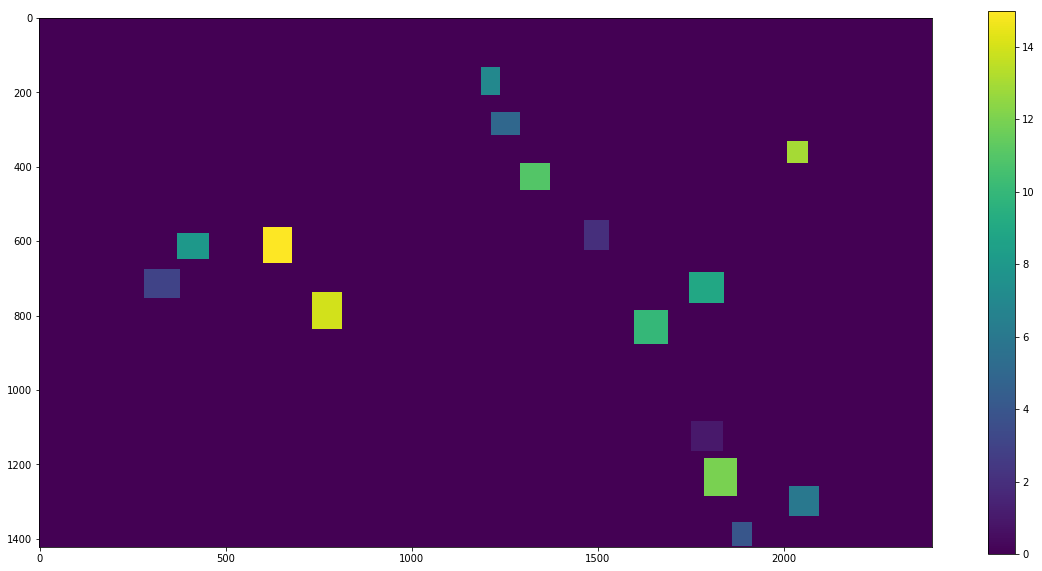

False

In [43]:
pun = [(1751, 258, 1837, 338), (1465, 799, 1531, 878), (283, 670, 378, 747), (1862, 2, 1914, 67), (1216, 1107, 1291, 1168), (2015, 82, 2094, 164), (1188, 1216, 1238, 1288), (370, 775, 456, 844), (1748, 657, 1840, 738), (1598, 546, 1689, 636), (1294, 959, 1372, 1030), (1788, 138, 1875, 237), (2010, 1033, 2065, 1090), (733, 586, 812, 685), (603, 763, 680, 858)]
plotearImagen(pun, 2400, 1422)
puntoValido((624, 693, 677, 789), (630, 769, 721, 832))